# Quantiacs Toolbox Sample: Bollinger bands
This tutorial will show you how to use Bollinger Bands with the Quantiacs Toolbox.  

In [1]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

This is just a simple sample to show how Bollinger Bands work.
For developing and testing a strategy, we will use the raw data in the tickerData folder that has been downloaded with the Toolbox's loadData function.

Here we extract the closing price of the Australian Dollar futures (F_AD) for the last year:

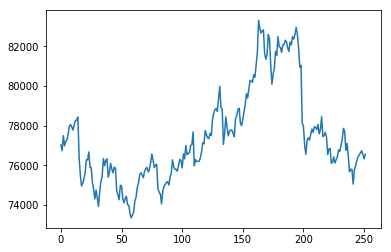

In [2]:
F_AD = pd.read_csv('./tickerData/F_AD.txt')
CLOSE = np.array(F_AD.loc[:252-1, [' CLOSE']])
plt.plot(CLOSE)

### What is a 'Bollinger Band®'
A Bollinger Band®, developed by the famous technical trader John Bollinger, is plotted two standard deviations away from a simple moving average.  

You may read more here: Bollinger Band® http://www.investopedia.com/terms/b/bollingerbands.asp#ixzz4joGECFt7 

We can create a function calculating Bollinger bands based on their definition.

In [3]:
def bollingerBands(a, n=20):
    sma = np.nansum(a[-n:]) / n
    std = np.std(a[-n:])
    return sma, sma + 2 * std, sma - 2 * std

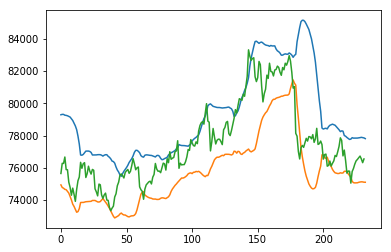

In [4]:
upperBand, lowerBand = np.zeros(252 - 20 + 1), np.zeros(252 - 20 + 1)
for i in range(252 - 20 + 1):
    _, upperBand[i], lowerBand[i] = bollingerBands(CLOSE[i:i+20])
plt.plot(upperBand)
plt.plot(lowerBand)
plt.plot(CLOSE[20:])

In this example of Bollinger Bands®, the price of the stock is bracketed by an upper and lower band along with a 20-day simple moving average. Because standard deviation is a measure of volatility, when the markets become more volatile, the bands widen; during less volatile periods, the bands contract.  
  
Bollinger Bands® are a highly popular technical analysis technique. Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market. John Bollinger has a set of 22 rules to follow when using the bands as a trading system.

Now lets take a look to see if Bollinger Bands could work in futures markets by using the Quantiacs Toolbox!

In [5]:
class myStrategy(object):
    
    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):

        def bollingerBands(a, n=20):
            sma = np.nansum(a[-n:]) / n
            std = np.std(a[-n:], ddof=1)
            return sma, sma + 2 * std, sma - 2 * std

        nMarkets = len(settings['markets'])
        threshold = settings['threshold']
        pos = np.zeros((1, nMarkets), dtype=np.float)

        for market in range(nMarkets):
            sma, upperBand, lowerBand = bollingerBands(CLOSE[:, market])
            currentPrice = CLOSE[-1, market]

            if currentPrice >= upperBand + (upperBand - lowerBand) * threshold:
                pos[0, market] = -1
            elif currentPrice <= lowerBand - (upperBand - lowerBand) * threshold:
                pos[0, market] = 1

        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        # Futures Contracts
        settings['markets'] = ['CASH', 'F_AD', 'F_BO', 'F_BP', 'F_C', 'F_CC', 'F_CD',
                               'F_CL', 'F_CT', 'F_DX', 'F_EC', 'F_ED', 'F_ES', 'F_FC', 'F_FV', 'F_GC',
                               'F_HG', 'F_HO', 'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_MD', 'F_MP',
                               'F_NG', 'F_NQ', 'F_NR', 'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_RB', 'F_RU',
                               'F_S', 'F_SB', 'F_SF', 'F_SI', 'F_SM', 'F_TU', 'F_TY', 'F_US', 'F_W', 'F_XX',
                               'F_YM']

        settings['beginInSample'] = '19900101'
        settings['endInSample'] = '20170522'
        settings['lookback'] = 20
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05

        settings['threshold'] = 0.4

        return settings

Loading Data...
Done! 
Evaluating Trading System


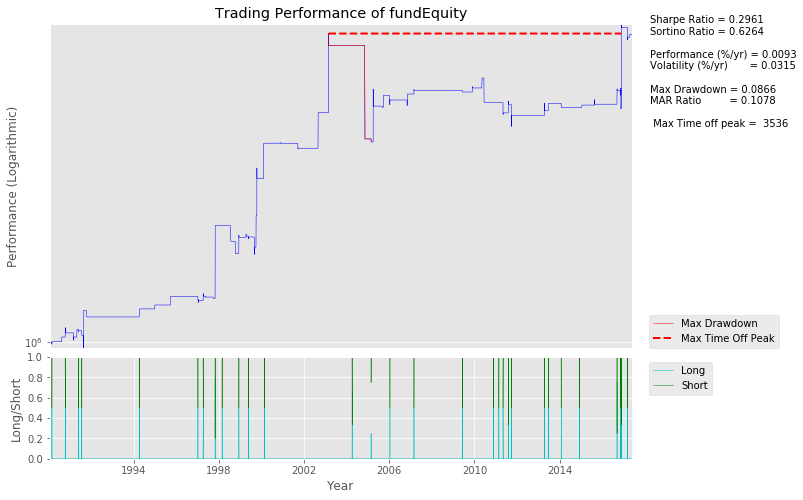

In [6]:
result = quantiacsToolbox.runts(myStrategy)

** Congrats! You just finished your first Bollinger Bands strategy.**  

John Bollinger suggests using them with two or three other non-correlated indicators that provide more direct market signals. He believes it is crucial to use indicators based on different types of data. Some of his favored technical techniques are moving average divergence/convergence (MACD), on-balance volume (OBV), and relative strength index (RSI).  

Try to optimize it!  

**Quantiacs https://www.quantiacs.com/**